In [1]:
import moments
import numpy as np
import matplotlib.pylab as plt
import demes
import demesdraw
import os
import matplotlib.cm as cm  # For color maps

In [2]:
import os 
os.chdir('moments/')

FileNotFoundError: [Errno 2] No such file or directory: 'moments/'

In [3]:
# read in my sfs
# SFS are stored as moments.Spectrum objects

fs_CAtl_Off = moments.Spectrum.from_file("/home/rbrennan/Tursiops-RAD-popgen/analysis/moments/fourpop_sfs_downsample/dadi/Coastal_Atlantic-Offshore.sfs")


In [3]:
fs_CAtl_Off.pop_ids


['Coastal_Atlantic', 'Offshore']

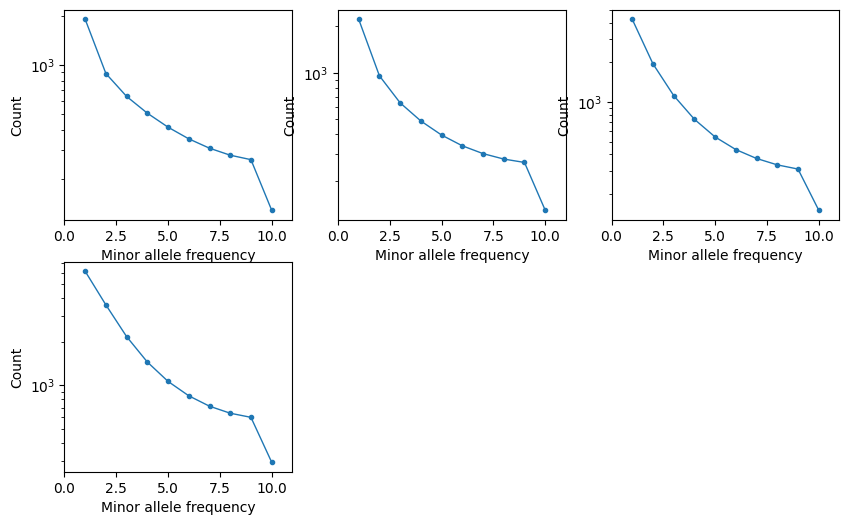

In [5]:
fs_1 = moments.Spectrum.from_file("/home/rbrennan/Tursiops-RAD-popgen/analysis/moments/fourpop_sfs_downsample/dadi/Coastal_Atlantic-20.sfs")
fs_2 = moments.Spectrum.from_file("/home/rbrennan/Tursiops-RAD-popgen/analysis/moments/fourpop_sfs_downsample/dadi/Coastal_Gulf-20.sfs")
fs_3 = moments.Spectrum.from_file("/home/rbrennan/Tursiops-RAD-popgen/analysis/moments/fourpop_sfs_downsample/dadi/Intermediate-20.sfs")
fs_4 = moments.Spectrum.from_file("/home/rbrennan/Tursiops-RAD-popgen/analysis/moments/fourpop_sfs_downsample/dadi/Offshore-20.sfs")

fig = plt.figure(1, figsize=(10,6))

ax = fig.add_subplot(2,3,1)
moments.Plotting.plot_1d_fs(fs_1, fig_num=None, show=True, ax=ax, out=None, ms=3, lw=1)

ax = fig.add_subplot(2,3,2)
moments.Plotting.plot_1d_fs(fs_2, fig_num=None, show=True, ax=ax, out=None, ms=3, lw=1)

ax = fig.add_subplot(2,3,3)
moments.Plotting.plot_1d_fs(fs_3, fig_num=None, show=True, ax=ax, out=None, ms=3, lw=1)

ax = fig.add_subplot(2,3,4)
moments.Plotting.plot_1d_fs(fs_4, fig_num=None, show=True, ax=ax, out=None, ms=3, lw=1)


In [ ]:
fs_CAtl_Off

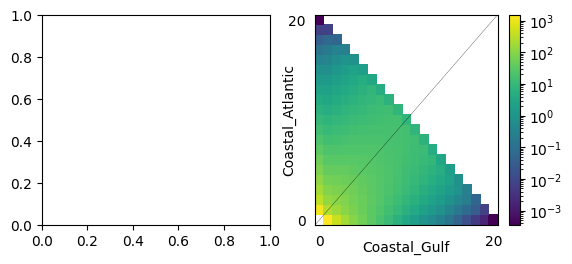

In [7]:
fs_CAtl_Off = moments.Spectrum.from_file("/home/rbrennan/Tursiops-RAD-popgen/analysis/moments/fourpop_sfs_downsample/dadi/Coastal_Atlantic-Coastal_Gulf.sfs")
#fs_CAtl_Off = moments.Spectrum.from_file("/home/rbrennan/Tursiops-RAD-popgen/analysis/moments/fourpop_sfs/dadi/Coastal_Atlantic-Offshore.sfs")
#fs_CAtl_Off = moments.Spectrum.from_file("/home/rbrennan/Tursiops-RAD-popgen/analysis/moments/fourpop_sfs/dadi/Coastal_Gulf-Intermediate.sfs")
#fs_CAtl_Off = moments.Spectrum.from_file("/home/rbrennan/Tursiops-RAD-popgen/analysis/moments/fourpop_sfs/dadi/Coastal_Gulf-Offshore.sfs")
#fs_CAtl_Off = moments.Spectrum.from_file("/home/rbrennan/Tursiops-RAD-popgen/analysis/moments/fourpop_sfs/dadi/Coastal_Atlantic-Offshore.sfs")

fs_CAtl_Off
#fs_proj = fs_CAtl_Off.project([30,30])
fig = plt.figure(1, figsize=(10,6))
fig.clear()
# Set the default colormap to viridis
plt.rcParams['image.cmap'] = 'viridis'

ax = fig.add_subplot(2,3,1)
#moments.Plotting.plot_single_2d_sfs(fs_proj, ax=ax, cmap='viridis')

ax = fig.add_subplot(2,3,2)
moments.Plotting.plot_single_2d_sfs(fs_CAtl_Off, ax=ax, cmap='viridis')



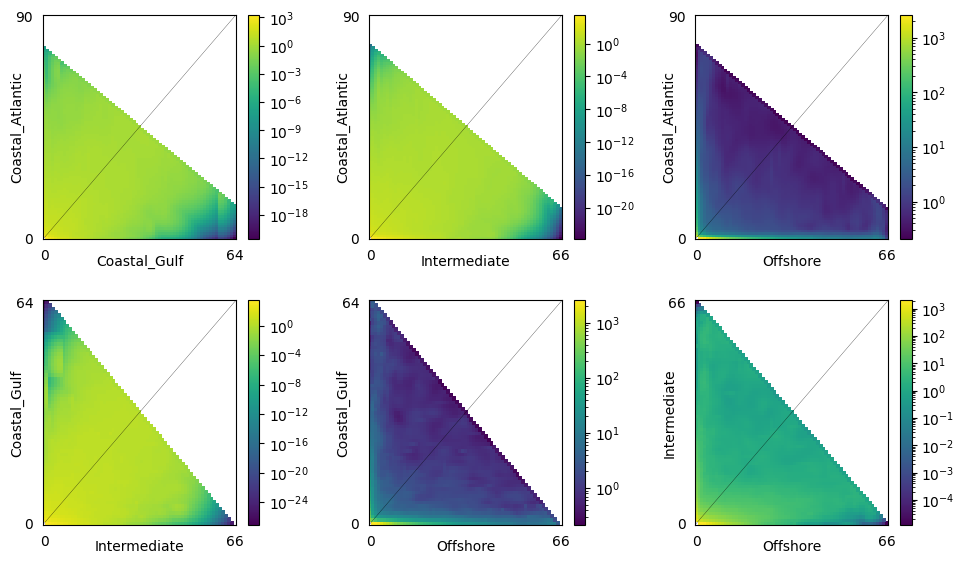

In [7]:

# List of files
files = [
    "/home/rbrennan/Tursiops-RAD-popgen/analysis/moments/fourpop_sfs/dadi/Coastal_Atlantic-Coastal_Gulf.sfs",
    "/home/rbrennan/Tursiops-RAD-popgen/analysis/moments/fourpop_sfs/dadi/Coastal_Atlantic-Intermediate.sfs",
    "/home/rbrennan/Tursiops-RAD-popgen/analysis/moments/fourpop_sfs/dadi/Coastal_Atlantic-Offshore.sfs",
    "/home/rbrennan/Tursiops-RAD-popgen/analysis/moments/fourpop_sfs/dadi/Coastal_Gulf-Intermediate.sfs",
    "/home/rbrennan/Tursiops-RAD-popgen/analysis/moments/fourpop_sfs/dadi/Coastal_Gulf-Offshore.sfs",
    "/home/rbrennan/Tursiops-RAD-popgen/analysis/moments/fourpop_sfs/dadi/Intermediate-Offshore.sfs"
]

# Plot each file one by one
fig = plt.figure(1, figsize=(10,6))
fig.clear()
i=1
for file in files:
    fs = moments.Spectrum.from_file(file)
    ax = fig.add_subplot(2,3,i)
    moments.Plotting.plot_single_2d_sfs(fs, ax=ax, cmap='viridis')
    plt.tight_layout(pad=2.0)
    i = i+1


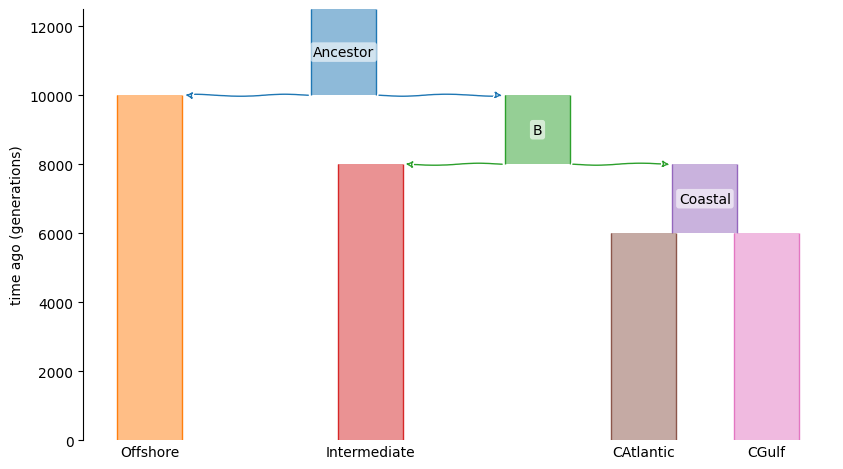

In [15]:
ooa_model = "fourpop_01_NoAdmix.yaml"

# we can visualize the model using demesdraw
graph = demes.load(ooa_model)
w = 1.5 * demesdraw.utils.size_max(graph)
positions = dict(X=0, A=-w, B=w)

fourpop_01=demesdraw.tubes(graph, log_time=False, num_lines_per_migration=3 , seed=1234);



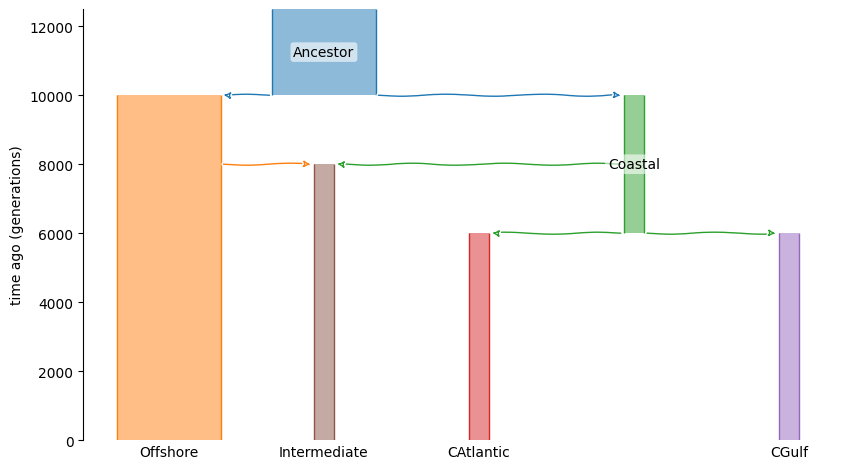

In [18]:
ooa_model = "fourpop_02_Admix_AncCoast.yaml"

# we can visualize the model using demesdraw
graph = demes.load(ooa_model)
w = 1.5 * demesdraw.utils.size_max(graph)
positions = dict(Ancestor=0, Offshore=-w, Intermediate=0, Coastal=w*2, CAtlantic=w, CGulf=w*3 )

demesdraw.tubes(graph, positions=positions, log_time=False, num_lines_per_migration=3 , seed=1234);

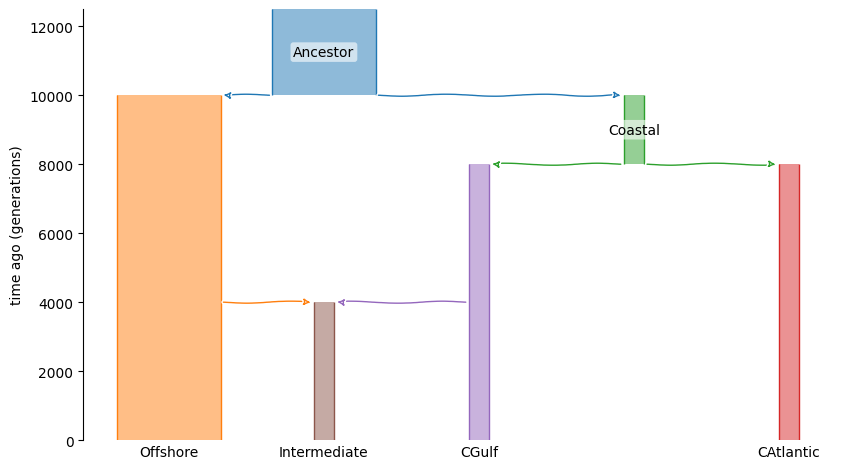

In [19]:
ooa_model = "fourpop_03_Admix_GulfCoast.yaml"

# we can visualize the model using demesdraw
graph = demes.load(ooa_model)
w = 1.5 * demesdraw.utils.size_max(graph)
positions = dict(Ancestor=0, Offshore=-w, Intermediate=0, Coastal=w*2, CAtlantic=w*3, CGulf=w)

demesdraw.tubes(graph, positions=positions, log_time=False, num_lines_per_migration=3 , seed=1234);

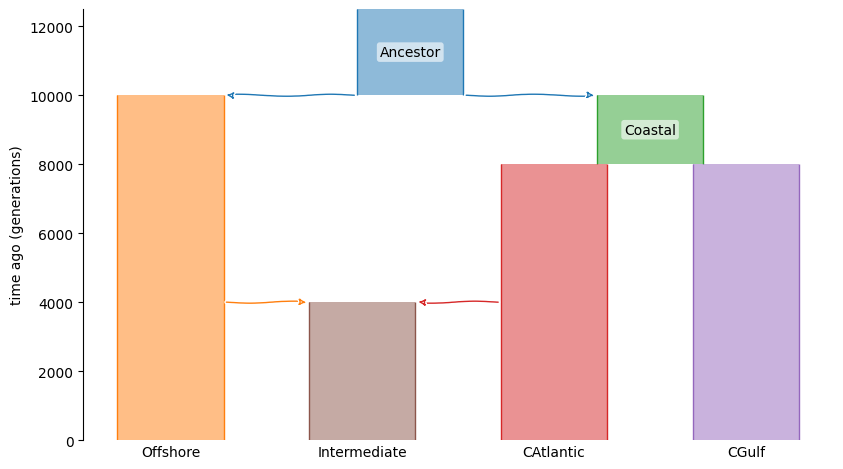

In [20]:
ooa_model = "fourpop_04_Admix_AtlCoast.yaml"

# we can visualize the model using demesdraw
graph = demes.load(ooa_model)
w = 1.5 * demesdraw.utils.size_max(graph)
positions = dict(Ancestor=0, Offshore=-w, Intermediate=0, Coastal=w*2, CAtlantic=w*3, CGulf=w)

demesdraw.tubes(graph, log_time=False, num_lines_per_migration=3 , seed=1234);

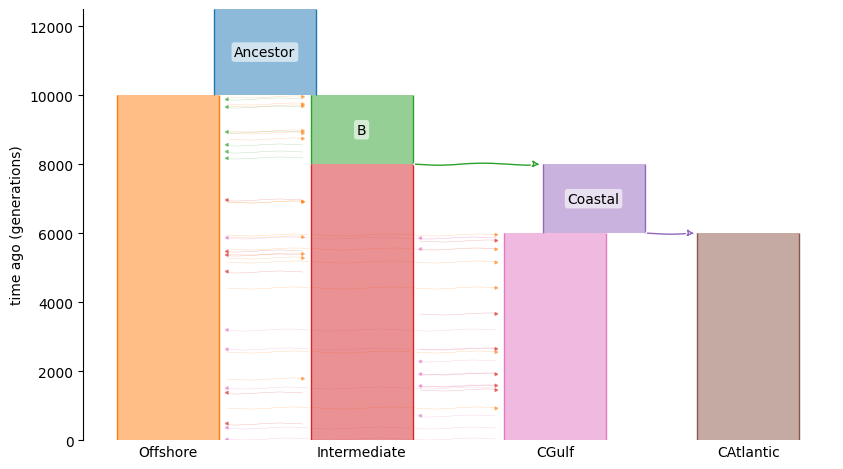

In [24]:
ooa_model = "fourpop_05_NoAdmix_Migration.yaml"

# we can visualize the model using demesdraw
graph = demes.load(ooa_model)
w = 1.5 * demesdraw.utils.size_max(graph)
positions = dict(Ancestor=0, Offshore=-w, Intermediate=0, Coastal=w*2, CAtlantic=w*3, CGulf=w)

demesdraw.tubes(graph, log_time=False, num_lines_per_migration=6 , seed=1234);

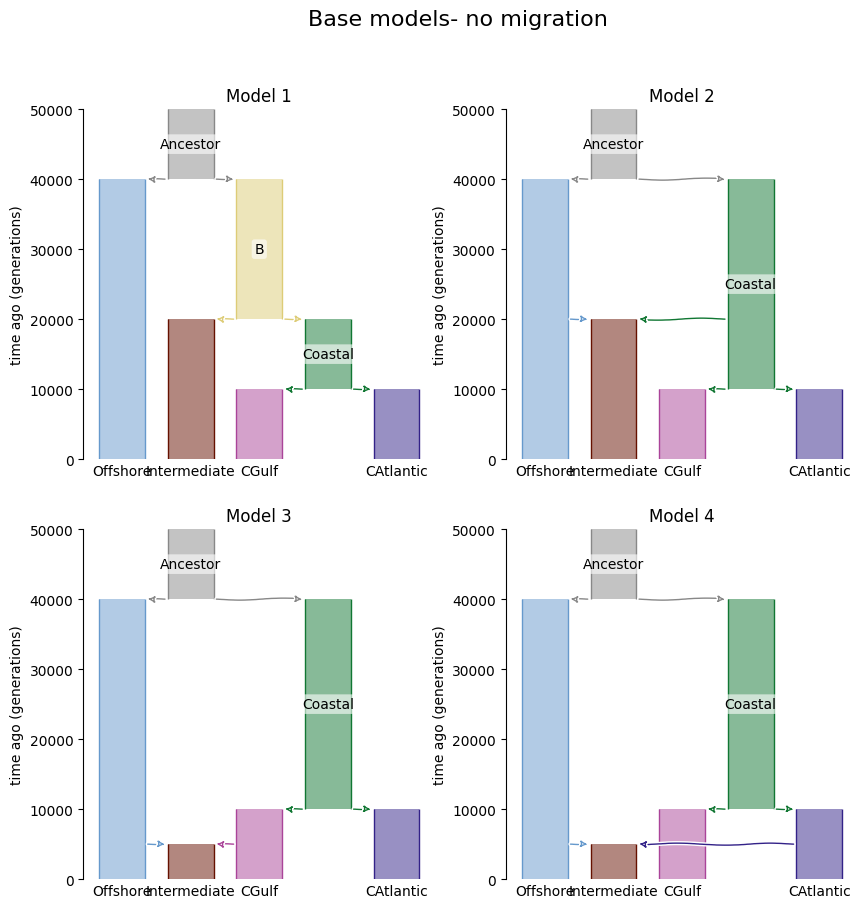

In [28]:
# Create a multi-panel figure directly
fig, axes = plt.subplots(2, 2, figsize=(10, 10))  # 1 row, 3 columns

# Plot each graph in its own panel
ooa_model = "fourpop_01_NoAdmix.yaml"

color_dict = {
    "B": "#DDCC77",    # Sand/yellow
    "Ancestor": "#888888",    
    "Offshore": "#6699CC",   
    "Intermediate": "#661100",    
    "Coastal": "#117733",    # Teal
    "CAtlantic": "#332288",    # Olive
    "CGulf": "#AA4499"    # Wine red
}

graph = demes.load(ooa_model)
w = 1.5 * demesdraw.utils.size_max(graph)
#positions = dict(Ancestor=0, Offshore=-w, Intermediate=0, Coastal=w*2, CAtlantic=w, CGulf=w*3, B= )
#CC6677,#DDCC77,#117733,#332288,#AA4499,#44AA99,#999933,#882255,#661100,#6699CC,#888888
positions = dict(Ancestor=0, Offshore=-w, Intermediate=0, Coastal=w*2, CAtlantic=w*3, CGulf=w, B=w)

fourpop_01=demesdraw.tubes(graph, positions=positions, log_time=False, num_lines_per_migration=3 , seed=1234, ax=axes[0,0], colours=color_dict);
axes[0,0].set_title("Model 1")

ooa_model = "fourpop_02_Admix_AncCoast.yaml"

graph = demes.load(ooa_model)
w = 1.5 * demesdraw.utils.size_max(graph)
positions = dict(Ancestor=0, Offshore=-w, Intermediate=0, Coastal=w*2, CGulf=w, CAtlantic=w*3 )

color_dict = {
    "Ancestor": "#888888",    
    "Offshore": "#6699CC",   
    "Intermediate": "#661100",    
    "Coastal": "#117733",    
    "CAtlantic": "#332288",    
    "CGulf": "#AA4499"    
}

demesdraw.tubes(graph, positions=positions, log_time=False, num_lines_per_migration=3 , seed=1234, ax=axes[0,1], colours=color_dict);
axes[0,1].set_title("Model 2")

ooa_model = "fourpop_03_Admix_GulfCoast.yaml"

# we can visualize the model using demesdraw
graph = demes.load(ooa_model)
w = 1.5 * demesdraw.utils.size_max(graph)
positions = dict(Ancestor=0, Offshore=-w, Intermediate=0, Coastal=w*2, CAtlantic=w*3, CGulf=w)

demesdraw.tubes(graph, positions=positions, log_time=False, num_lines_per_migration=3 , seed=1234, ax=axes[1,0], colours=color_dict);
axes[1,0].set_title("Model 3")

ooa_model = "fourpop_04_Admix_AtlCoast.yaml"

# we can visualize the model using demesdraw
graph = demes.load(ooa_model)
w = 1.5 * demesdraw.utils.size_max(graph)
positions = dict(Ancestor=0, Offshore=-w, Intermediate=0, Coastal=w*2, CAtlantic=w*3, CGulf=w)

demesdraw.tubes(graph, positions=positions, log_time=False, num_lines_per_migration=3 , seed=1234, ax=axes[1,1], colours=color_dict);
axes[1,1].set_title("Model 4")

# Adjust layout and save
#plt.tight_layout()
fig.suptitle("Base models- no migration", fontsize=16, y=0.98)

save_path = os.path.expanduser("~/Tursiops-RAD-popgen/figures/moments/fourpop_NoMigration.png")
plt.savefig(save_path, dpi=300)
plt.show()

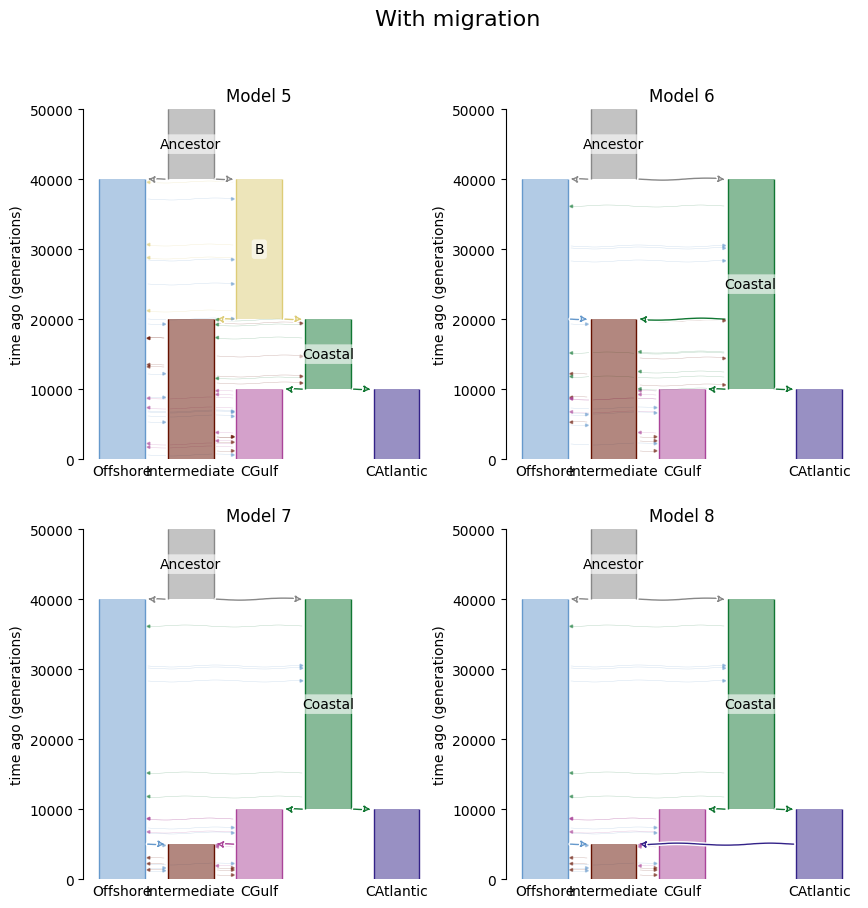

In [32]:
# Create a multi-panel figure directly
fig, axes = plt.subplots(2, 2, figsize=(10, 10))  # 2 row, 2 columns

color_dict = {
    "B": "#DDCC77",    # Sand/yellow
    "Ancestor": "#888888",    
    "Offshore": "#6699CC",   
    "Intermediate": "#661100",    
    "Coastal": "#117733",    # Teal
    "CAtlantic": "#332288",    # Olive
    "CGulf": "#AA4499"    # Wine red
}

ooa_model = "fourpop_05_NoAdmix_Migration.yaml"

# we can visualize the model using demesdraw
graph = demes.load(ooa_model)
w = 1.5 * demesdraw.utils.size_max(graph)
positions = dict(Ancestor=0, Offshore=-w, Intermediate=0, Coastal=w*2, CAtlantic=w*3, CGulf=w, B=w)
demesdraw.tubes(graph, log_time=False, positions=positions, num_lines_per_migration=4 , seed=1234, colours=color_dict,ax=axes[0,0],);

axes[0,0].set_title("Model 5")

ooa_model = "fourpop_06_Admix_AncCoast_Migration.yaml"

graph = demes.load(ooa_model)
w = 1.5 * demesdraw.utils.size_max(graph)
positions = dict(Ancestor=0, Offshore=-w, Intermediate=0, Coastal=w*2, CGulf=w, CAtlantic=w*3 )

color_dict = {
    "Ancestor": "#888888",    
    "Offshore": "#6699CC",   
    "Intermediate": "#661100",    
    "Coastal": "#117733",    
    "CAtlantic": "#332288",    
    "CGulf": "#AA4499"    
}

demesdraw.tubes(graph, positions=positions, log_time=False, num_lines_per_migration=3 , seed=1234, ax=axes[0,1], colours=color_dict);
axes[0,1].set_title("Model 6")

ooa_model = "fourpop_07_Admix_GulfCoast_Migration.yaml"

# we can visualize the model using demesdraw
graph = demes.load(ooa_model)
w = 1.5 * demesdraw.utils.size_max(graph)
positions = dict(Ancestor=0, Offshore=-w, Intermediate=0, Coastal=w*2, CAtlantic=w*3, CGulf=w)

demesdraw.tubes(graph, positions=positions, log_time=False, num_lines_per_migration=3 , seed=1234, ax=axes[1,0], colours=color_dict);
axes[1,0].set_title("Model 7")

ooa_model = "fourpop_08_Admix_AtlCoast_Migration.yaml"

# we can visualize the model using demesdraw
graph = demes.load(ooa_model)
w = 1.5 * demesdraw.utils.size_max(graph)
positions = dict(Ancestor=0, Offshore=-w, Intermediate=0, Coastal=w*2, CAtlantic=w*3, CGulf=w)

demesdraw.tubes(graph, positions=positions, log_time=False, num_lines_per_migration=3 , seed=1234, ax=axes[1,1], colours=color_dict);
axes[1,1].set_title("Model 8")

# Adjust layout and save
#plt.tight_layout()
fig.suptitle("With migration", fontsize=16, y=0.98)

save_path = os.path.expanduser("~/Tursiops-RAD-popgen/figures/moments/fourpop_Migration.png")
plt.savefig(save_path, dpi=300)
plt.show()



## Inferring demography
Moments uses scipy’s optimization functions to perform optimization.

1) the data (SFS) to be fit,
2) a parameterized demographic model, and
3) And yaml options file to tell the optimization function which parameters to fit and any constraints on those parameters.

We already have 1 and 2. 

In [66]:
fs = moments.Spectrum.from_file("/home/rbrennan/Tursiops-RAD-popgen/analysis/moments/fourpop_sfs/dadi/Coastal_Atlantic-Coastal_Gulf-Intermediate-Offshore.sfs")
fs

Spectrum([[[[-- 724.7050221117572 1387.604305346397 ... 2.931360807032593e-11
    1.226166723455375e-12 2.350003385397375e-14]
   [148.2839883204262 256.1173837360404 315.3861893904624 ...
    5.571662178218038e-10 2.379780818831825e-11 4.690920523210046e-13]
   [190.6138127510787 149.2229128595622 116.5875047506341 ...
    4.801032500321408e-09 2.147440282590392e-10 4.504107937500441e-12]
   ...
   [1.74769736477578e-116 1.992544599170172e-96 4.680487263450891e-93
    ... 1.663152399915808e-46 2.150628103339416e-47
    1.194793390744133e-48]
   [1.260964909650616e-119 7.610941937243012e-99 1.787810261058444e-95
    ... 3.599896969514673e-49 4.655039184717268e-50
    2.58613288039851e-51]
   [0.0 1.115156327801222e-101 2.619502214005158e-98 ...
    2.494731094604926e-52 3.225945380954659e-53 1.792191878308163e-54]]

  [[54.36996468488179 67.14593320055789 65.55252751461818 ...
    1.046228709653072e-12 6.528573643203208e-14 1.884718727770194e-15]
   [48.41404836676094 40.12521395614228

In [69]:
fs.pop_ids

['Coastal_Atlantic', 'Coastal_Gulf', 'Intermediate', 'Offshore']

In [71]:
new_pop_ids = ['CAtlantic', 'CGulf', 'Intermediate', 'Offshore']
fs = moments.Spectrum(fs, pop_ids=new_pop_ids)
fs.pop_ids

['CAtlantic', 'CGulf', 'Intermediate', 'Offshore']

In [72]:
# the sfs:
#fs = moments.Spectrum.from_file("/home/rbrennan/Tursiops-RAD-popgen/analysis/moments/fourpop_sfs/dadi/Coastal_Atlantic-Coastal_Gulf-Intermediate-Offshore.sfs")

deme_graph = "fourpop_01_NoAdmix.yaml"
options = "/home/rbrennan/Tursiops-RAD-popgen/scripts/demography/moments/options_fourpop_01_NoAdmix.yaml"
output = "/home/rbrennan/Tursiops-RAD-popgen/analysis/moments/model1-best-fit.yaml"

ret = moments.Demes.Inference.optimize(
    deme_graph,
    options,
    fs,
    method="fmin",
    output=output,
    overwrite=True
)
param_names, opt_params, LL = ret
print("Log-likelihood:", -LL)
print("Best fit parameters")
for n, p in zip(param_names, opt_params):
    print(f"{n}\t{p:.3}")

KeyboardInterrupt: 

In [ ]:
fs = moments.Spectrum.from_demes(output, samples={"MSL": data.sample_sizes})
fs = moments.Misc.flip_ancestral_misid(fs, opt_params[-1])
moments.Plotting.plot_1d_comp_multinom(fs, data)

In [ ]:
import demes, demesdraw
opt_model = demes.load(output)
demesdraw.size_history(opt_model, invert_x=True, log_time=True);

In [ ]:
# to calculate uncertainty, I need bootstrapped data:
std_err = moments.Demes.Inference.uncerts(
    output,
    options,
    data,
    bootstraps=bootstraps,
    uL=uL,
    bootstraps_uL=bootstraps_uL,
    method="GIM",
)